In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import geopandas


#Import Libraries

ModuleNotFoundError: No module named 'geopandas'

In [2]:
insurance_dataframe = pd.read_csv('insurancedata.csv') 

#Load the dataset

In [3]:
#chi_zips = geopandas.read_file('Chicago Zip_Codes.shp')



In [4]:
insurance_dataframe.columns

#Define columns

Index(['Unnamed: 0', 'Zip', 'Race', 'Fire', 'Theft', 'Age', 'Volun', 'Invol',
       'Income'],
      dtype='object')

In [5]:
insurance_dataframe.drop('Unnamed: 0', inplace=True, axis=1)

#Remove indexed column / data CSV cleaning

In [6]:
insurance_dataframe.head(50)
#Analyse Data

,Zip,Race,Fire,Theft,Age,Volun,Invol,Income
0,60626,10.0,6.2,29,60.4,5.3,0.0,11744
1,60640,22.2,9.5,44,76.5,3.1,0.1,9323
2,60613,19.6,10.5,36,73.5,4.8,1.2,9948
3,60657,17.3,7.7,37,66.9,5.7,0.5,10656
4,60614,24.5,8.6,53,81.4,5.9,0.7,9730
5,60610,54.0,34.1,68,52.6,4.0,0.3,8231
6,60611,4.9,11.0,75,42.6,7.9,0.0,21480
7,60625,7.1,6.9,18,78.5,6.9,0.0,11104
8,60618,5.3,7.3,31,90.1,7.6,0.4,10694
9,60647,21.5,15.1,25,89.8,3.1,1.1,9631


In [7]:
insurance_dataframe.info()
#Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zip     47 non-null     int64  
 1   Race    47 non-null     float64
 2   Fire    47 non-null     float64
 3   Theft   47 non-null     int64  
 4   Age     47 non-null     float64
 5   Volun   47 non-null     float64
 6   Invol   47 non-null     float64
 7   Income  47 non-null     int64  
dtypes: float64(5), int64(3)
memory usage: 3.1 KB


In [8]:
#Voluntary Markets and Involuntary markets - Invol is Declines in Volunatry so 
# Total Activity = Vol + Invol
#Conver to % Invol ACtivity as Invol / (Invol + Vol)
Total = insurance_dataframe['Volun'] + insurance_dataframe['Invol']
per_rej = (insurance_dataframe['Invol'] / Total ) * 100
insurance_dataframe['per_rej'] = per_rej

#Add Fire and Theft as both per 1000 
insurance_dataframe['fire_theft'] = insurance_dataframe['Fire'] + insurance_dataframe['Theft'] 

#Drop Fire, Theft, Vol and Invol
insurance_dataframe = insurance_dataframe.drop(['Zip','Fire', 'Theft','Invol','Volun'], axis=1)



In [9]:
cols = ['per_rej','Race','fire_theft','Age','Income']
insurance_dataframe = insurance_dataframe[cols]


In [10]:
insurance_dataframe

,per_rej,Race,fire_theft,Age,Income
0,0.000000,10.0,35.2,60.4,11744
1,3.125000,22.2,53.5,76.5,9323
2,20.000000,19.6,46.5,73.5,9948
3,8.064516,17.3,44.7,66.9,10656
4,10.606061,24.5,61.6,81.4,9730
5,6.976744,54.0,102.1,52.6,8231
6,0.000000,4.9,86.0,42.6,21480
7,0.000000,7.1,24.9,78.5,11104
8,5.000000,5.3,38.3,90.1,10694
9,26.190476,21.5,40.1,89.8,9631


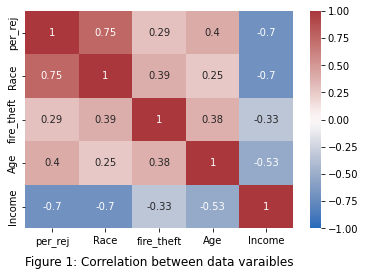

In [11]:
matrix = insurance_dataframe.corr().round(2)
ax = plt.axes()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax = ax)
ax.set_title('Figure 1: Correlation between data varaibles', y = -0.2)
plt.show()


#See correlation between variables

In [12]:
#Remove Income
insurance_dataframe = insurance_dataframe.drop('Income', axis=1)

In [13]:
insurance_dataframe

,per_rej,Race,fire_theft,Age
0,0.000000,10.0,35.2,60.4
1,3.125000,22.2,53.5,76.5
2,20.000000,19.6,46.5,73.5
3,8.064516,17.3,44.7,66.9
4,10.606061,24.5,61.6,81.4
5,6.976744,54.0,102.1,52.6
6,0.000000,4.9,86.0,42.6
7,0.000000,7.1,24.9,78.5
8,5.000000,5.3,38.3,90.1
9,26.190476,21.5,40.1,89.8


<AxesSubplot:xlabel='fire_theft'>

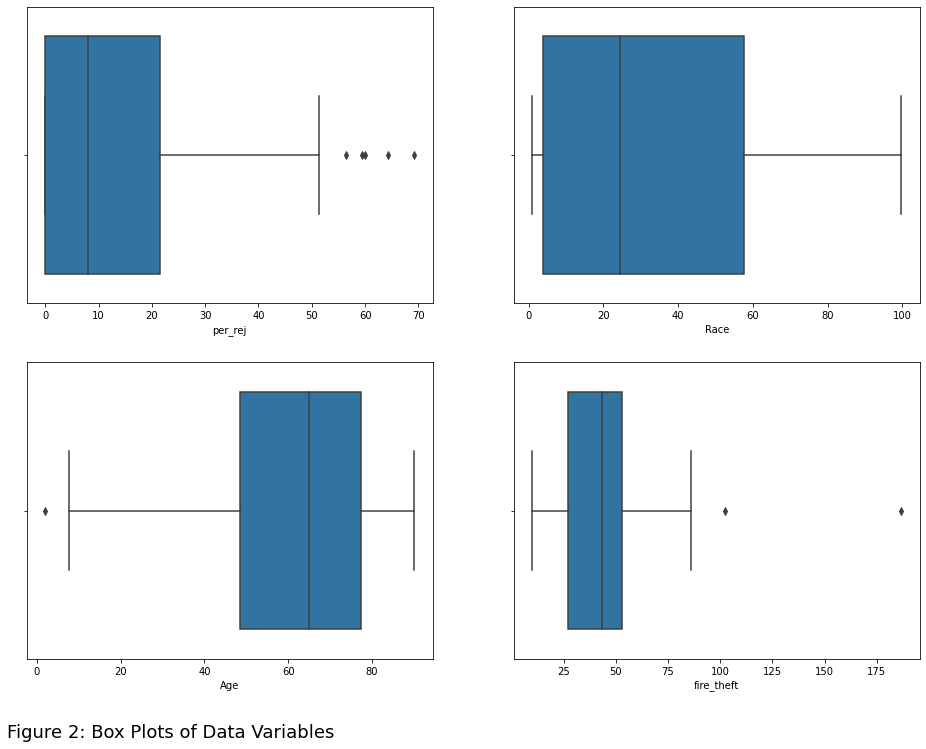

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

fig.suptitle('Figure 2: Box Plots of Data Variables', y = 0.05, x = 0.25, fontsize=18)
sns.boxplot(ax=axs[0,0], data=insurance_dataframe, x='per_rej')
sns.boxplot(ax=axs[0,1], data=insurance_dataframe, x='Race')
sns.boxplot(ax=axs[1,0], data=insurance_dataframe, x='Age')
sns.boxplot(ax=axs[1,1], data=insurance_dataframe, x='fire_theft')



In [15]:
#Treat outliers
ins_df_processed = insurance_dataframe[(np.abs(
    stats.zscore(insurance_dataframe['fire_theft'])) < 1)]
ins_df_processed = ins_df_processed[ins_df_processed['Age'] > 40]

In [16]:
len(ins_df_processed)

35

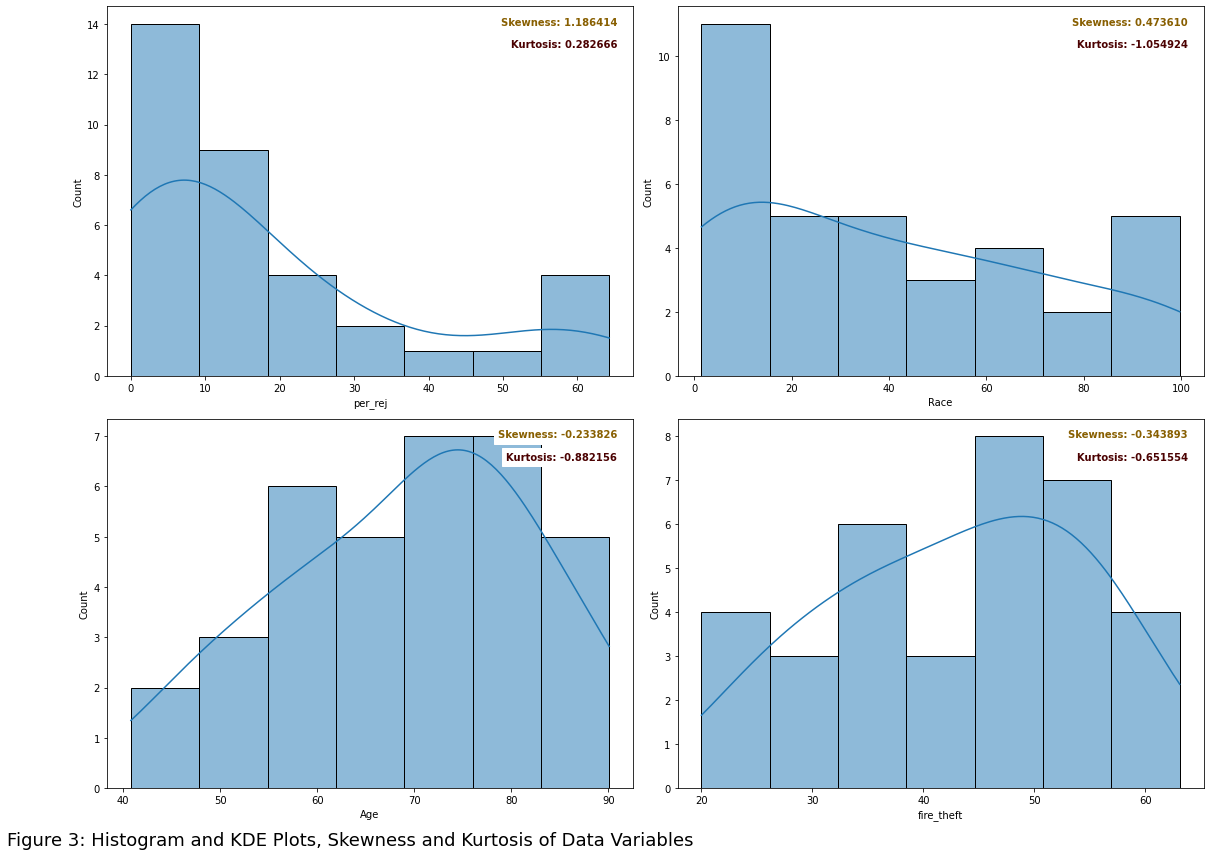

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Figure 3: Histogram and KDE Plots, Skewness and Kurtosis of Data Variables', y = 0, x = 0.25, fontsize=18)
sns.histplot(ax=axs[0,0], data=ins_df_processed, x='per_rej', 
             kde=True)
sns.histplot(ax=axs[0,1], data=ins_df_processed, x='Race', 
             kde=True)
sns.histplot(ax=axs[1,0], data=ins_df_processed, x='Age', 
             kde=True)
sns.histplot(ax=axs[1,1], data=ins_df_processed, x='fire_theft', 
             kde=True)
for i, ax in enumerate(axs.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % ins_df_processed.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % ins_df_processed.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()



<AxesSubplot:xlabel='Age', ylabel='Count'>

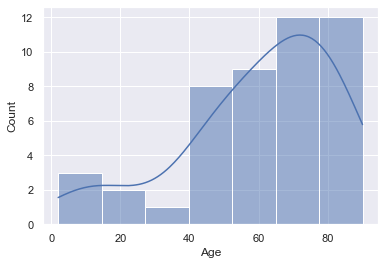

In [18]:
sns.set(style="darkgrid")
sns.histplot( data=insurance_dataframe, 
             x='Age', 
             kde=True)
#Distribution of Income (Plot of Interest)

<AxesSubplot:xlabel='fire_theft', ylabel='Count'>

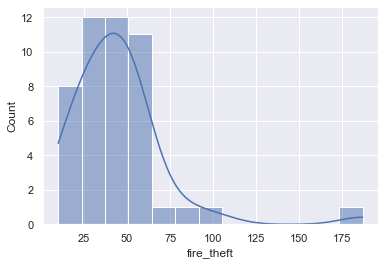

In [19]:
sns.set(style="darkgrid")
sns.histplot( data=insurance_dataframe, 
             x='fire_theft', 
             kde=True)
#Distribution of Theft (Plot of Interest)

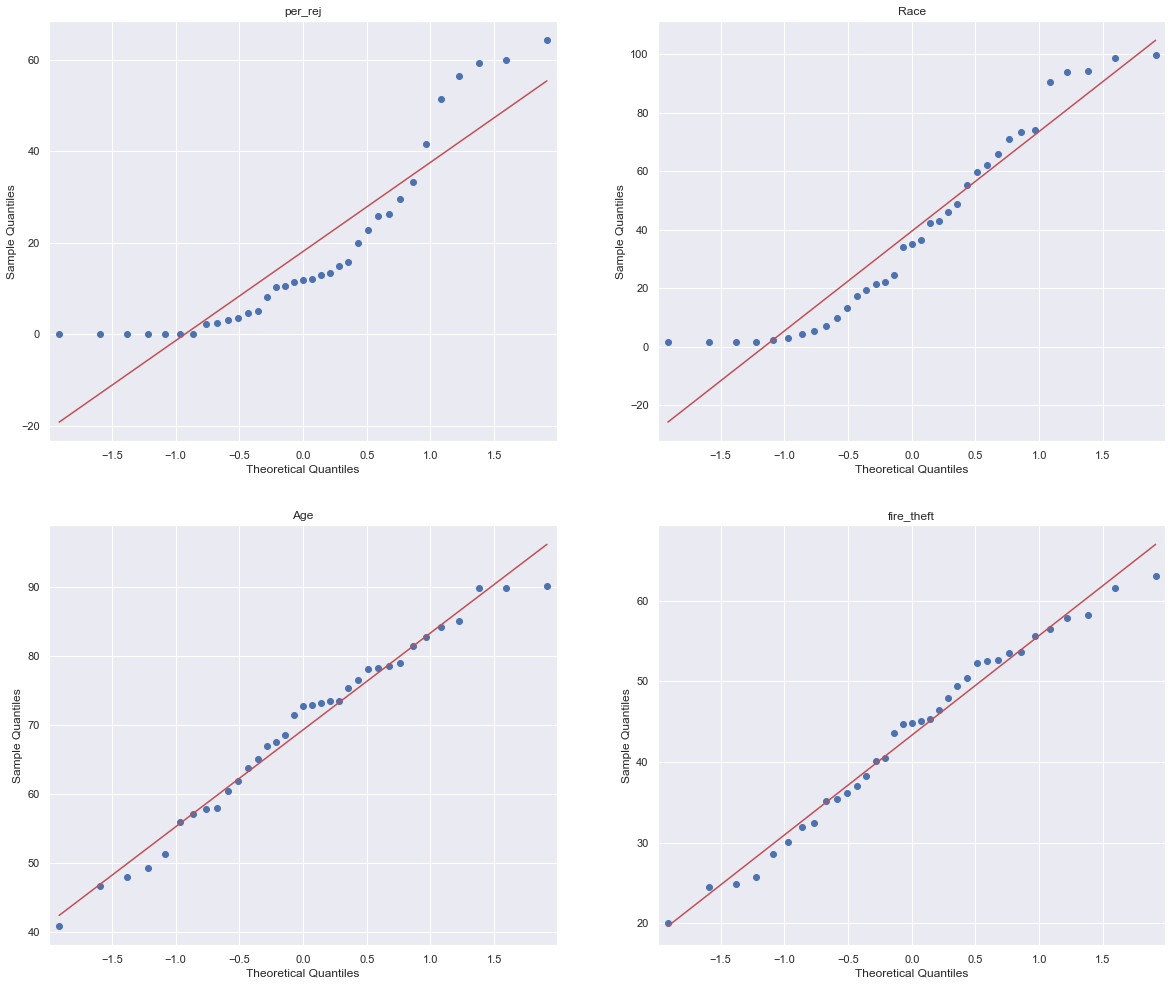

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(20, 17))
sm.qqplot(ins_df_processed.per_rej, ax= (axs[0,0]), line='r')
sm.qqplot(ins_df_processed.Race, ax= (axs[0,1]), line='r')
sm.qqplot(ins_df_processed.Age, ax= (axs[1,0]), line='r')
sm.qqplot(ins_df_processed.fire_theft, ax= (axs[1,1]), line='r')


axs[0,0].set_title('per_rej')
axs[0,1].set_title('Race')
axs[1,0].set_title('Age')
axs[1,1].set_title('fire_theft')


plt.show()

#QQ Plot #Income can be tranformed

In [21]:
len(ins_df_processed)

35

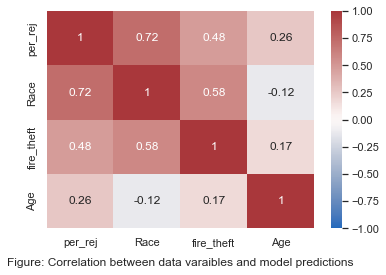

In [36]:
matrix_processed = ins_df_processed.corr().round(2)
ax = plt.axes()
sns.heatmap(matrix_processed, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax = ax)
ax.set_title('Figure: Correlation between data varaibles and model predictions', y = -0.2)
plt.show()


#See correlation between variables

In [50]:
#Model 1

M1_X = ins_df_processed.drop( 'per_rej',axis=1)
M1_Y = ins_df_processed['per_rej']

M2_X = ins_df_processed.drop( ['per_rej','fire_theft'],axis=1)#ins_df_processed['Race']
M2_Y = ins_df_processed['per_rej']

M3_X = ins_df_processed.drop( ['per_rej','Race'],axis=1)
M3_Y = ins_df_processed['per_rej']

In [51]:
M1_X = sm.add_constant(M1_X) #X Variables 
model1 = sm.OLS(M1_Y,M1_X).fit() #Fit Model
predictions1 = model1.predict(M1_X)
print_model1 = model1.summary()

M2_X = sm.add_constant(M2_X)
model2 = sm.OLS(M2_Y,M2_X).fit()
predictions2 = model2.predict(M2_X)
print_model2 = model2.summary()

M3_X = sm.add_constant(M3_X)
model3 = sm.OLS(M3_Y,M3_X).fit()
predictions3 = model3.predict(M3_X)
print_model3 = model3.summary()


In [24]:
ins_df_processed.head()

,per_rej,Race,fire_theft,Age
0,0.000000,10.0,35.2,60.4
1,3.125000,22.2,53.5,76.5
2,20.000000,19.6,46.5,73.5
3,8.064516,17.3,44.7,66.9
4,10.606061,24.5,61.6,81.4


In [25]:
ins_model_df = ins_df_processed[['per_rej']].copy() #Y Column

In [26]:
ins_model_df['Model_1'] = predictions1.tolist() # x columns
ins_model_df['Model_2'] = predictions2.tolist()
ins_model_df['Model_3'] = predictions3.tolist()






In [35]:
print_model1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                per_rej   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     18.02
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           5.93e-07
Time:                        20:29:11   Log-Likelihood:                -135.84
No. Observations:                  35   AIC:                             279.7
Df Residuals:                      31   BIC:                             285.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6634     13.050     -2.656      0.012     -61.279      -8.047
Race           0.4719      0.084      5.646      0.000       0.301       0.642
fire_theft    -0.0655      0.239     -0.274      0.786      -0.552       0.421
Age            0.5333      0.171      3.113      0.004       0.184       0.883
==============================================================================
Omnibus:                        2.418   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                1.269
Skew:                           0.294   Prob(JB):                        0.530
Kurtosis:                       3.724   Cond. No.                         576.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
print_model2.tables[0]
print_model2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                per_rej   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     27.79
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.01e-07
Time:                        21:21:17   Log-Likelihood:                -135.88
No. Observations:                  35   AIC:                             277.8
Df Residuals:                      32   BIC:                             282.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.9874     11.949     -3.012      0.005     -60.326     -11.648
Race           0.4577      0.065      7.060      0.000       0.326       0.590
Age            0.5196      0.161      3.218      0.003       0.191       0.848
==============================================================================
Omnibus:                        1.702   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                0.740
Skew:                           0.257   Prob(JB):                        0.691
Kurtosis:                       3.494   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print_model3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                per_rej   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     5.641
Date:                Mon, 07 Nov 2022   Prob (F-statistic):            0.00797
Time:                        20:29:11   Log-Likelihood:                -148.22
No. Observations:                  35   AIC:                             302.4
Df Residuals:                      32   BIC:                             307.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.8955     18.293     -1.853      0.073     -71.156       3.365
fire_theft     0.7658      0.263      2.907      0.007       0.229       1.302
Age            0.2717      0.231      1.175      0.249      -0.199       0.743
==============================================================================
Omnibus:                        7.000   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.260
Skew:                           1.033   Prob(JB):                       0.0437
Kurtosis:                       3.154   Cond. No.                         513.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


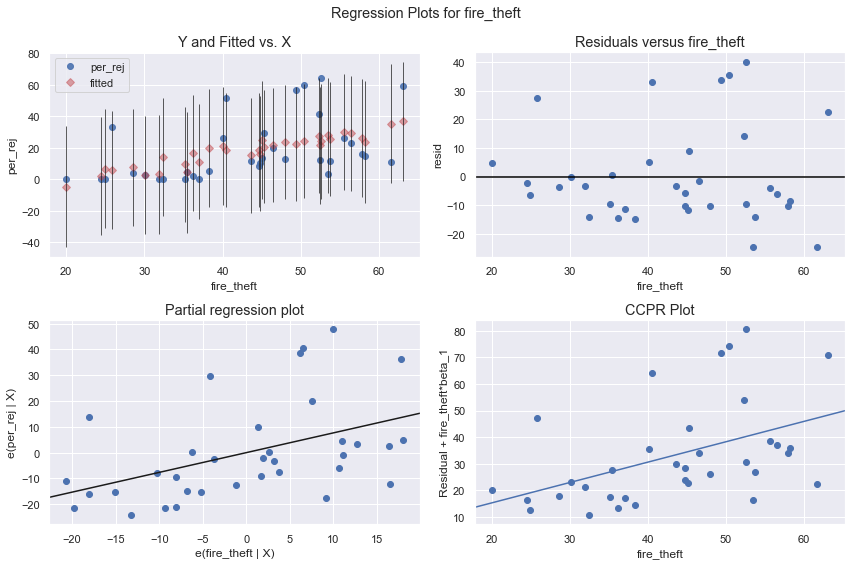

In [56]:
#Create a residuals plot 
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model3, 'fire_theft', fig=fig)

eval_env: 1


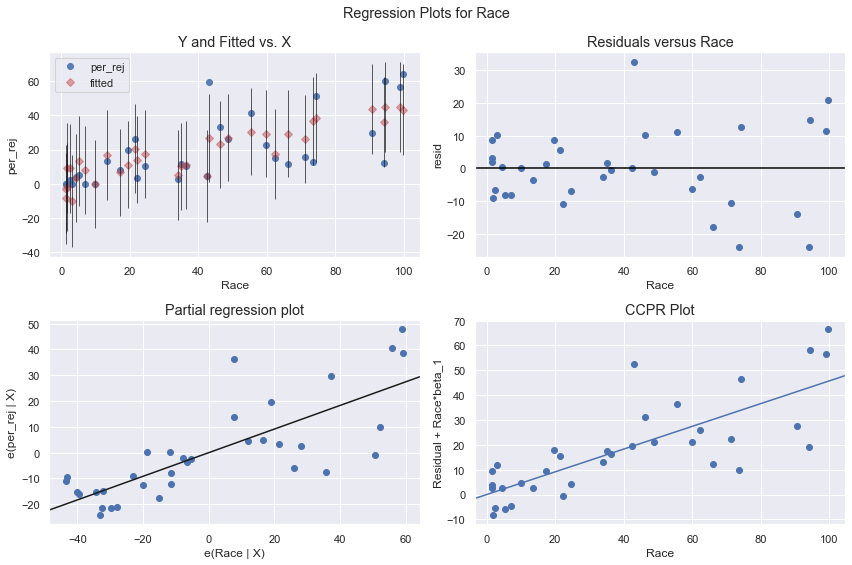

In [55]:
#Create a residuals plot 
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'Race', fig=fig)


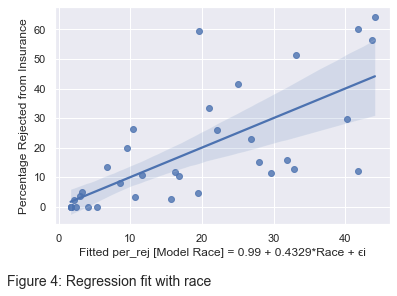

In [41]:
fig, ax = plt.subplots()
fig.suptitle('Figure 4: Regression fit with race'
             , y = -0.05, x = 0.25, fontsize=14)

#ax1 = sns.regplot(x='Model_3', y='per_rej', 
                  #data=ins_model_df,  
                  #label = 'per_rej [Model No Race] = -33.90+ 0.77*fire_theft+ 0.27*Age + ϵi ')
ax2 = sns.regplot(x='Model_2', y='per_rej', 
                  data=ins_model_df,  
                  label = 'per_rej [Model Race] = 0.99 + 0.4329*Race + ϵi')
ax.set_xlabel('Fitted per_rej [Model Race] = 0.99 + 0.4329*Race + ϵi')
ax.set_ylabel('Percentage Rejected from Insurance')

#plt.legend()
plt.show()

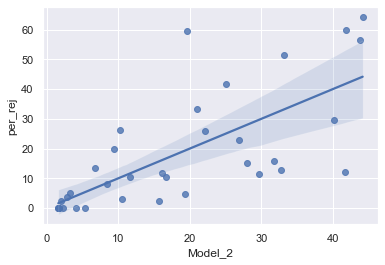

In [31]:
fig, ax = plt.subplots()
ax1 = sns.regplot(x='Model_2', y='per_rej', 
                  data=ins_model_df  
                 )

In [32]:
print_model1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                per_rej   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     18.02
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           5.93e-07
Time:                        20:29:11   Log-Likelihood:                -135.84
No. Observations:                  35   AIC:                             279.7
Df Residuals:                      31   BIC:                             285.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6634     13.050     -2.656      0.012     -61.279      -8.047
Race           0.4719      0.084      5.646      0.000       0.301       0.642
fire_theft    -0.0655      0.239     -0.274      0.786      -0.552       0.421
Age            0.5333      0.171      3.113      0.004       0.184       0.883
==============================================================================
Omnibus:                        2.418   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                1.269
Skew:                           0.294   Prob(JB):                        0.530
Kurtosis:                       3.724   Cond. No.                         576.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#sns.regplot(x='Invol', y='Race', data=processed_insur_df)
sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=processed_insur_df,
    x="Invol", y="Race", hue="Age",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")


NameError: name 'processed_insur_df' is not defined

In [ ]:
print(print_model2)

In [ ]:
from statsmodels.formula.api import ols
lm=ols('Invol~ Race + Fire + Theft + Age + Invol + Income', 
       data=processed_insur_df).fit()


In [ ]:
lm2=ols('Invol~ Race', 
       data=processed_insur_df).fit()

In [ ]:
table = sm.stats.anova_lm(lm, typ = 2)
table2 = sm.stats.anova_lm(lm2, typ = 2)

In [ ]:
table2